In [10]:

import numpy as np
import pandas as pd

# Define parameters
f = lambda t, y : 1+y/t+(y/t)**2 # ODE
actual = lambda t : t*np.tan(np.log(t))  # Actual solution
h = 0.2 # Step size
t = np.arange(1, 3+h*2 , h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[1] = s0
ss = np.zeros(len(t))
ss[1]=s0
for i in range(0, len(t) - 1):
 ss[i]=actual(t[i])
 s[i + 1] = s[i] + h*f(t[i], s[i])

df = pd.DataFrame({'t_i' : t, 'w_i' : s, 'actual' : ss, 'error' : ss-s})
print(df)

    t_i       w_i    actual     error
0   1.0  0.000000  0.000000  0.000000
1   1.2  0.200000  0.221243  0.021243
2   1.4  0.438889  0.489682  0.050793
3   1.6  0.721243  0.812753  0.091510
4   1.8  1.052038  1.199439  0.147401
5   2.0  1.437251  1.661282  0.224031
6   2.2  1.884261  2.213502  0.329241
7   2.4  2.402270  2.876551  0.474282
8   2.6  3.002837  3.678475  0.675638
9   2.8  3.700601  4.658665  0.958064
10  3.0  4.514277  5.874100  1.359823
11  3.2  5.468089  0.000000 -5.468089


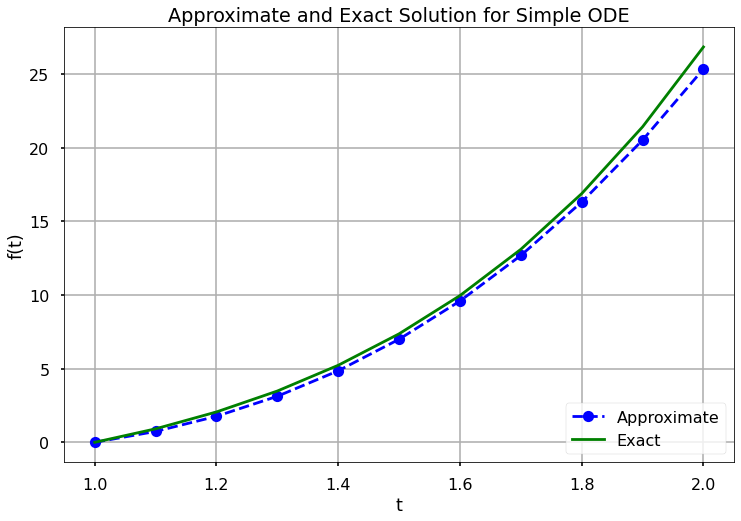

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, y: (2/t)*y + (t**2)*(np.e ** 2)# ODE
h = 0.1 # Step size
t = np.arange(1, 2 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[1] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

#print(s)

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, t**2*(np.exp(t))-np.e, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [18]:
import sympy
import numpy as np
import math
y, t = sympy.symbols('y t')
f= y/t - (y/t)**2
df = sympy.diff(f,t)
d2f = sympy.diff(df,t)
print(d2f)

a = 1;          #% left endpoint
b = 1.2;         # % right endpoint
h = 0.1;        #% stepsize
N = (b-a)/h;    #% the number of steps
alpha = 1;
N = math.ceil(N)
#print(N)
t = np.zeros(N)
w = np.zeros(N)

t[0] = a
w[1] = alpha

for i in range(N):
    w[i+1] = w[i] + h*f(t[i],w[i]) + (h**2/2)*df(t[i])
    t[i+1] = a +i*h

print(t)

2*y/t**3 - 6*y**2/t**4


TypeError: 'Add' object is not callable

In [1]:
from scipy.misc import derivative
import math

class TaylorSeries():
    def __init__(self, function, order, center=0):
        self.center = center
        self.f = function
        self.order = order
        self.d_pts = order*2
        self.coefficients = []

        # number of points (order) for scipy.misc.derivative
        if self.d_pts % 2 == 0: # must be odd and greater than derivative order
            self.d_pts += 1

        self.__find_coefficients()

    def __find_coefficients(self):
        for i in range(0, self.order+1):
            self.coefficients.append(round(derivative(self.f, self.center, n=i, order=self.d_pts)/math.factorial(i), 5))


In [2]:
def print_equation(self):
    eqn_string = ""
    for i in range(self.order + 1):
        if self.coefficients[i] != 0:
            eqn_string += str(self.coefficients[i]) + ("(x-{})^{}".format(self.center, i) if i > 0 else "") + " + "
    eqn_string = eqn_string[:-3] if eqn_string.endswith(" + ") else eqn_string
    print(eqn_string)

def print_coefficients(self):
    print(self.coefficients)

def get_coefficients(self):
    """
        Returns the coefficients of the taylor series
    """
    return self.coefficients

In [5]:
#from TaylorSeries import TaylorSeries

def f(y,t):
    return y/t - (y/t)**2

if __name__ == '__main__':
    terms = 2
    center = 1
    precision = 3

    ts = TaylorSeries(f, terms, center)
    ts.print_coefficients()
    ts.print_equation()

TypeError: f() missing 1 required positional argument: 't'